In [4]:
from IPython.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
Note: code is in Python. Matlab does not work with the interactive elements used in this notebook.
''')

# Steepest Descent

Consider a simple quadratic function of two variables,
$$f(x)= x_1^2 + \beta x_2^2$$

The following figure shows the iterations for a steepest descent algorithm with
exact line search.  All solutions start from the same starting point:
$x_0=(10,1)$.  The parameter $\beta$ controls the eccentricity of the quadratic
function and can be changed in the slider.

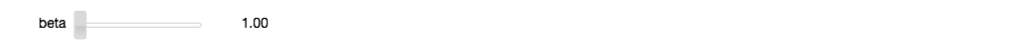

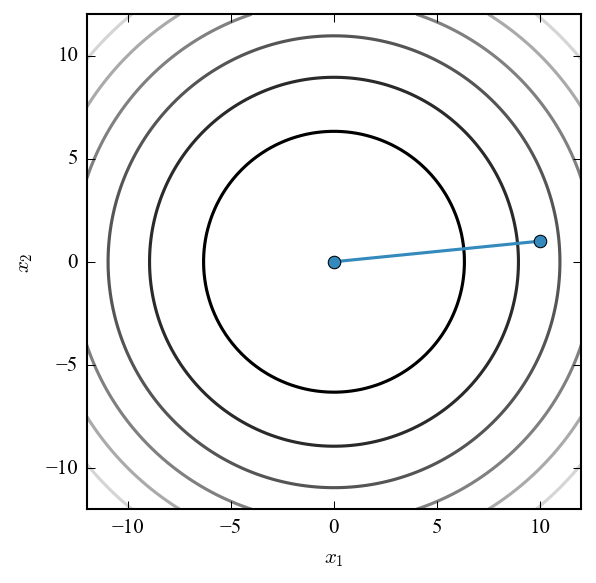

iterations = 1


In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brent
from ipywidgets import interact
from __future__ import print_function


def func(x, beta):
    """function to minimize"""
    return x[0]**2 + beta*x[1]**2

def grad(x, beta):
    """gradient of function"""
    g = np.zeros(2)
    g[0] = 2*x[0]
    g[1] = 2*beta*x[1]
    return g



@interact(beta=(1.0, 15.0, 1.0))
def steepestdescent(beta=1.0):
    """steepest descent with exact line search"""
        
    # evaluate on grid for plotting purposes
    x1 = np.linspace(-12, 12, 100)
    x2 = np.linspace(-12, 12, 100)
    X1, X2 = np.meshgrid(x1, x2)
    F = X1**2 + beta*X2**2

    plt.figure()
    plt.contour(X1, X2, F, cmap=plt.cm.get_cmap("gray"))
    
    # initialize iteration history
    x = [10, 1]
    x1 = [x[0]]
    x2 = [x[1]]

    # initial step size and iteration count
    alpha = 1.0  
    
    while True:  # continue until converged

        # search direction along gradient
        p = grad(x, beta)  
        
        # check convergence.  if grad is approx zero or step size is small.
        if alpha < 0.01 or np.linalg.norm(p) < 1e-8:
            break

        # normalize search direction for simplicity, and head in descent direction
        p = -p/np.linalg.norm(p)
        
        # find exact minimum along search direction (x + alpha*p) using Brent's method
        # we could do a better job establishing a bracket, but this simple approach works fine for this example
        alpha = brent(lambda alpha: func(x + alpha*p, beta), brack=(0.001, alpha/10.0, 100.0))
        
        # take step
        x += alpha*p
        
        # save iteration
        x1.append(x[0])
        x2.append(x[1])

    # plot iteration history
    plt.plot(x1, x2, '-o')
    plt.axes().set_aspect('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()
    
    print('iterations =', len(x1)-1)

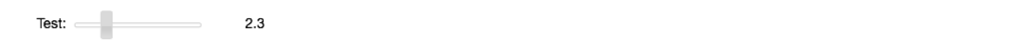

In [7]:
import ipywidgets as widgets

widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    slider_color='white'
)